# Single Cavity Simulator

## Electrical Model of the Cavity

In this Notebook, electrical model of a superconducting TESLA type RF cavity will be shown.

Resonant modes in cavities can be described by means of resonant RLC circuits. In the figure below, simplified structure for the LLRF system with modelled cavity can be seen.  [1]

![Electrical model of the cavity](img/cavity_model.png)

$I_g$ represents the generator current from the Klystron and $I_b$ represents the beam induced current on the cavity.

Generator output coupling is represented byt a lossless transformer with a transformation ratio of $1:N$

As seen from the right side of reference plane B, the circuit looks like: 

![Electrical model of the cavity](img/right_side_reference_b.png)


Where: 

$$
\tilde{I_g} = 2I_g
$$
$$
Z_{ext} = N^2Z_0 
$$


Quality factor $Q$ can be defined as: 

$$
Q = 2\pi\frac{\text{Stored energy in the cavity}}{\text{Dissipated energy per cycle}} = \omega_0RC = \frac{R}{\omega_0L}
$$

Energy loss also occour in coupler or in waveguides. This can be represented as external quality factor $Q_{ext}$. Hence total loaded quality factor $Q_{l}$ can be defined as:

$$ 
\frac{1}{Q_{l}} = \frac{1}{Q_{0}} + \frac{1}{Q_{ext}}
$$

Instead of the transformation ratio $1:N$, it is useful to describe the coupling between transmission line and cavity by the so-called coupling factor $\beta$. This factor $\beta$ is definad as the ratio of the resistor R in the RLC circuit to the transformed external load $Z_{ext}$ 

$$
\beta = \frac{R}{Z_{ext}} = \frac{R}{Z_{ext}}
$$

With this equation we can re-define the following parameters: 

$$
R_l = \frac{R}{R+\beta}
$$

Half-width-half-magnitude (HWHM) of a cavity $ w_{1/2} $ is:

$$
w_{1/2} = \frac{w_0}{2Q_l}
$$

and Detuning of the cavity ${\Delta}w$ is: 

$$
{\Delta}w = w_0 - w
$$


## State-Space Representation

The differential equation describing the cavity voltage is: 

$$
\frac{d}{dt} \begin{pmatrix} V_r \\ V_i \\ \end{pmatrix} =   \begin{pmatrix} -w_{1/2} & -{\Delta}w \\ {\Delta}w  & -w_{1/2} \\ \end{pmatrix} \begin{pmatrix} V_r \\ V_i \\ \end{pmatrix} + \begin{pmatrix} R_Lw_{1/2} & 0 \\ 0  & R_L w_{1/2} \\ \end{pmatrix} \begin{pmatrix} I_r \\ I_i \\ \end{pmatrix}
$$

where Voltage and current represented in a complex plane

$$
V(t) = (V_r(t) + iV_i(t)).e^{iwt}
$$

$$
I(t) = (I_r(t) + iI_i(t)).e^{iwt} 
$$

This leads to the following equation for the real and imaginary part of the cavity voltage: 

$$
\frac{d}{dt}V_r = -w_{1/2}V_r - \Delta{w}{V_i} + R_Lw_{1/2}I_r
$$

$$
\frac{d}{dt}V_i = \Delta{w}{V_r} - w_{1/2}V_i + R_Lw_{1/2}I_i
$$

We can now solve this differential equation using odeint package from scipy

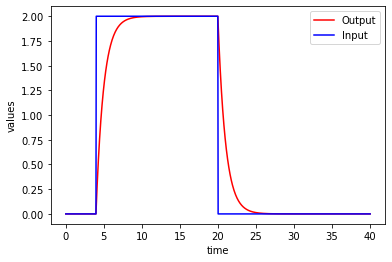

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# function that returns dV_r/dt
def model(V_r,t,generator):
    w_half = 1
    delta_w = 1
    R_l = 1
    dV_rdt = -w_half*V_r + R_l*w_half*generator
    return dV_rdt

# initial condition
V_r0 = 0

# time points
t = np.linspace(0,40,1000)

# step input
generator = np.zeros(1000)
generator[100:500] = 2.0

# solve ODE
#y = odeint(model,V_r0,t)
V_r[0] = 0

for i in range(1,1000):
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,V_r0,tspan,args=(generator[i],))
    y[i] = z[1][0]
    #next initial condition
    V_r0 = z[1]

# plot results
plt.plot(t,y,'r-',label='Output')
plt.plot(t,generator,'b-',label='Input')

plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()


## References

[ [1] Vector Sum Control of Pulsed Accelerating Fields in Lorentz Force Detuned Superconducting Cavities, Thomas Schilcher, Hamburg 1998](https://bib-pubdb1.desy.de/record/291638/files/schilcher.pdf)